![challenge header](https://raw.githubusercontent.com/robynfsj/cfg-big-data-challenge/master/images/header.jpg?token=ANPGOVNWGP52LH4EC2QDSYK7NOQV2)

## Team M
Laura Ramoskaite  
Dimitra Charalampopoulou    
Güzide Sofi  
Robyn Seymour-Jones  
  
***

# The effects of COVID-19 lockdown measures on the supply and demand of electricity in the UK

## 1. Introduction

<-- Intro paragraph 1: explain briefly what has happened in terms on COVID-19 and lockdown. Mention it was global but move specific into what happened in the UK (e.g. give date when people were told to stay at home, could mention number of deaths as of today etc.). -->

<-- Intro paragraph 2: explain why it is important to do this this challenge. Mention climate change facts (with references if possible) and the need to ensure a sustainable recovery from COVID-19 lockdown. -->

<-- Intro paragraph 3: explain why we are looking at electricity data in particular. Give some facts with references about CO2 emissions from UK electricity generation. -->

### Aims  
We have established the following aims that we want acheive:  
  
1. Find out what has been the impact of COVID-19 on the supply and demand of electricity in the UK.  
2. Find out what would have happened to the supply and demand of UK electricity if COVID-19 had not happened.  
  
### Objectives  
In order to acheive our aims, we will complete the following objectives:  
  
1. Plot historical data of total electricity sold in the UK as an indicator of demand.  
2. Plot 2020 electricity sold against stringency to show impact of COVID on demand.  
3. Plot 2020 average rolling demand to show high resolution impact of COVID lockdown measures on demand.  
4. Model total electricity sold data to see what the demand would have been without COVID.  

<-- NOTE: If we have time we could do objectives 1 - 3 split in terms of renewable, non-renewable. -->

The following libraries are required:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

## 2. UK electricity supply and demand prior to COVID-19

<-- We could have three plots here:

plot 1 – monthly electricity sold for the past 5 years
plot 2 – plot of electricity production by power station type (e.g. gas, coal, wind, solar)
plot 3 – plot of electricity production by renewable and non-renewable (or by fossil fuel and non fossil fuel) -->


## 3. The impact of COVID-19 on UK electricity supply and demand
  


### 3.1 Change in the demand of electricity


<-- Paragraph : explain what the Oxford stringency index is a reference it. -->

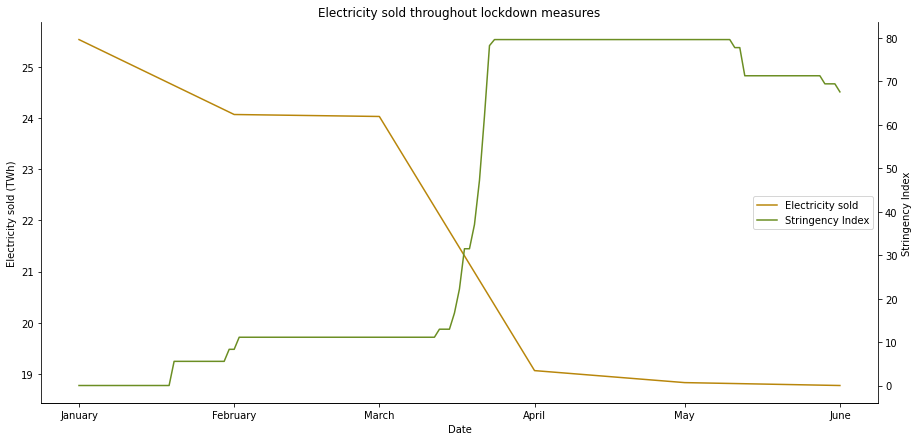

In [2]:


# Import response indices data.
response_indices = pd.read_excel('../data/response_indices.xlsx', sheet_name='UK_combined')

# Convert dates to datetime.
response_indices['date'] = pd.to_datetime(response_indices['date'].astype(str),
                                          format ='%Y%m%d')

# Select only the data we are interested in – the government response index (stringency).
stringency = response_indices[['date', 'stringency_index']]

# Check data is correct.
stringency


# Read in data.
elec_sold = pd.read_excel('../data/electricity_clean.xlsx', sheet_name='6.2')

# Create a datetime colum so it is easy to plot against time.
elec_sold['date'] = elec_sold['year'].astype(str) + '-' + elec_sold['month'].astype(str)
elec_sold['date'] = pd.to_datetime(elec_sold['date'],
                                       format='%Y-%B')

# Check data.
elec_sold

# Choose start and end dates for electricity.
start_date = '2020-01-01'
end_date = '2020-08-23'

# Choose start and end dates for stringency.
start_date = '2020-01-01'
end_date = '2020-06-01'

# Get Python to select only the data you have asked for.
plot_data = elec_sold.loc[(elec_sold['date'] >= start_date) & 
                          (elec_sold['date'] <= end_date)]
string_plot = stringency.loc[(stringency['date'] >= start_date) & 
                             (stringency['date'] <= end_date)]

# Plot electricity.
fig, ax1 = plt.subplots(figsize=(15, 7))
ax1.set_title('Electricity sold throughout lockdown measures')
ax1.set_xlabel('Date')
ax1.set_ylabel('Electricity sold (TWh)')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

plt.plot(plot_data['date'],
         plot_data['electricity_sold_total'],
         color='darkgoldenrod',
         label='Electricity sold')

# Plot government response index.
ax2 = ax1.twinx()
ax2.set_ylabel('Stringency Index')
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)

plt.plot(string_plot['date'], 
         string_plot['stringency_index'], 
         color='olivedrab',
         label='Stringency Index')

# Plot legend.
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

leg = ax2.legend(lines + lines2, labels + labels2,
                 frameon=True,
                 loc='center right')

# Define the date format
date_form = DateFormatter("%B")
ax1.xaxis.set_major_formatter(date_form)

<-- Paragraph interpreting the data. Make sure to explain that the demand does always go down in summer anyway. -->

<-- Paragraph explaining that it might be better to look at higher resolution data. -->

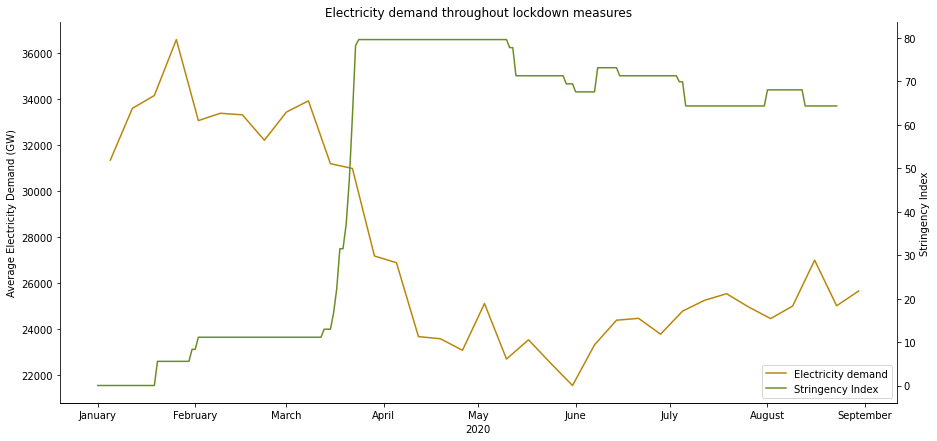

In [3]:
# Import csv file created in MySQL.
avg_weekly_demand = pd.read_csv('../data/avg_demand_wk.csv')

# Convert last date in the week to datetime.
avg_weekly_demand['last_date_of_week'] = pd.to_datetime(avg_weekly_demand['last_date_of_week'].astype(str),
                                                        format = '%Y-%m-%d')

# Plot demand.
fig, ax1 = plt.subplots(figsize=(15, 7))
ax1.set_xlabel('2020')
ax1.set_ylabel('Average Electricity Demand (GW)')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_title('Electricity demand throughout lockdown measures')
plt.plot(avg_weekly_demand['last_date_of_week'],
         avg_weekly_demand['demand_GW'],
         color='darkgoldenrod',
         label='Electricity demand')

# Plot government response index.
ax2 = ax1.twinx()
ax2.set_ylabel('Stringency Index')
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
plt.plot(stringency['date'], 
         stringency['stringency_index'], 
         color='olivedrab',
         label='Stringency Index')

# Plot legend.
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

leg = ax2.legend(lines + lines2, labels + labels2,
                 frameon=True,
                 loc='lower right')

# Define the date format
date_form = DateFormatter("%B")
ax1.xaxis.set_major_formatter(date_form)

## 4. What would have happened if COVID-19 had not happened?

Model prediciting how much electricity would have been sold throughout 2020 if COVID-19 hadn't happened.

## 5. Conclusion

## References